We can divide the pipeline of the solution to 3 connected modules. The first one is resposible for reading and analyze the data. I didn't need to make any clean and reformatting to the text as there are no constraints on the text. The second one is features extraction, and finally the classification module using Keras library.

## Reading and Data Analysis

The following class is responsible for reading the data and data analysis. I needed to know some characteristics of the text. The characters frequencies and text length were my main focus as features. I could tell that the "shape" of the text maybe a gem feature to classify the text. So, I made some analysis to the text to know the average length of spam text and non-spam text, also, the common used characters in both classes.

From the analysis, I got that the spam text always the average length are much greater than legit text. Also, there are some variations in the characters frequencies.

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain


class DataManager(object):
    def __init__(self, file_name):
        self.__file_name = file_name
        self.__data = None

        self.__read()

    def __read(self):
        self.__data = pd.read_csv(str(self.__file_name), encoding='latin-1')
        self.__data = self.__data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
        self.__sentences = self.__data['v2']
        self.__labels = self.__data['v1']

    def count(self):
        print(self.__data.v1.value_counts())

        sb.countplot(x='v1', data=self.__data)
        plt.show()

    def most_frequent_character_in_spam(self):
        spams = self.__data.loc[self.__data['v1'] == 'spam']
        spams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(spams['v2'])))
        spams = list(map(lambda v: v.split(), spams))
        spams = list(chain.from_iterable(spams))
        spams_characters_frequencies = list(map(lambda v: Counter(v), spams))
        all_counter = spams_characters_frequencies[0]

        for i in range(1, len(spams_characters_frequencies)):
            all_counter += spams_characters_frequencies[i]

        print("Characters frequency in spams\n")
        print(all_counter)

        plt.bar(range(len(all_counter)), all_counter.values(), align='center')
        plt.xticks(range(len(all_counter)), all_counter.keys())

        plt.show()

    def most_frequent_character_in_legit(self):
        spams = self.__data.loc[self.__data['v1'] == 'ham']
        spams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(spams['v2'])))
        spams = list(map(lambda v: v.split(), spams))
        spams = list(chain.from_iterable(spams))
        spams_characters_frequencies = list(map(lambda v: Counter(v), spams))
        all_counter = spams_characters_frequencies[0]

        for i in range(1, len(spams_characters_frequencies)):
            all_counter += spams_characters_frequencies[i]

        print("Characters frequency in hams\n")
        print(all_counter)

        plt.bar(range(len(all_counter)), all_counter.values(), align='center')
        plt.xticks(range(len(all_counter)), all_counter.keys())

        plt.show()

    def most_frequent_characters(self):
        spams = self.__data.loc[self.__data['v1'] == 'spam']
        hams = self.__data.loc[self.__data['v1'] == 'ham']

        spams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(spams['v2'])))
        hams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(hams['v2'])))

        spams = list(map(lambda v: v.split(), spams))
        hams = list(map(lambda v: v.split(), hams))

        spams = list(chain.from_iterable(spams))
        hams = list(chain.from_iterable(hams))

        spams_characters_frequencies = list(map(lambda v: Counter(v), spams))
        hams_characters_frequencies = list(map(lambda v: Counter(v), hams))

        spams_all_counter = spams_characters_frequencies[0]
        hams_all_counter = hams_characters_frequencies[0]

        for i in range(1, len(spams_characters_frequencies)):
            spams_all_counter += spams_characters_frequencies[i]

        print(spams_all_counter)

        for i in range(1, len(hams_characters_frequencies)):
            hams_all_counter += hams_characters_frequencies[i]

        max_length = max(len(spams_all_counter), len(hams_all_counter))

        plt.bar(range(len(spams_all_counter)), spams_all_counter.values(), align='center', color='red')
        plt.bar(range(len(hams_all_counter)), hams_all_counter.values(), align='center', color='blue')
        plt.xticks(range(max_length), spams_all_counter.keys() if max_length == len(spams_all_counter) else hams_all_counter.keys())

        plt.show()

    def average_text_length(self):
        spams = self.__data.loc[self.__data['v1'] == 'spam']
        hams = self.__data.loc[self.__data['v1'] == 'ham']

        spams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(spams['v2'])))
        hams = list(map(lambda v: v.strip().encode('ascii', 'ignore'), list(hams['v2'])))

        spams_average_length = sum(len(text) for text in spams) / len(spams)
        hams_average_length = sum(len(text) for text in hams) / len(hams)

        print("Spams average text length: " + str(spams_average_length))
        print("Hams average text length: " + str(hams_average_length))

    def get_text(self):
        return list(self.__data['v2'])

    def get_labels(self):
        return list(self.__data['v1'])

C:\Python27\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
dm = DataManager('spam.csv')
dm.most_frequent_character_in_spam()
dm.most_frequent_character_in_legit()
dm.most_frequent_characters()
dm.average_text_length()

Characters frequency in spams

Counter({'e': 6682, 'o': 5824, 't': 4884, 'a': 4424, 'r': 4035, 'n': 3699, 'i': 3411, 's': 3278, 'l': 3154, '0': 3088, 'c': 2094, 'u': 2032, 'd': 1813, 'm': 1736, 'p': 1612, '1': 1573, 'h': 1569, '.': 1560, 'w': 1559, 'y': 1489, '2': 1269, '8': 1215, 'T': 1061, 'g': 990, '5': 966, 'f': 942, 'E': 899, 'b': 841, 'C': 835, '7': 802, '4': 795, 'S': 780, '3': 727, '6': 726, 'O': 703, 'v': 685, 'x': 683, 'k': 661, 'N': 655, '9': 611, 'R': 601, 'A': 592, '!': 542, 'P': 525, 'U': 466, 'M': 454, 'W': 434, 'I': 425, 'L': 421, ',': 405, '/': 372, 'F': 371, 'B': 341, 'H': 337, 'D': 334, 'G': 328, 'Y': 296, '-': 247, 'X': 216, ':': 179, '&': 178, 'z': 175, '?': 174, 'V': 174, "'": 127, 'K': 122, '*': 115, '+': 99, 'J': 90, 'j': 89, ')': 65, '(': 53, 'Q': 48, 'q': 38, '>': 30, '@': 25, '=': 25, '\\': 24, '"': 19, 'Z': 17, '<': 6, '#': 6, '$': 4, '[': 3, '_': 3, '%': 3, ']': 3, ';': 2})
Characters frequency in hams

Counter({'e': 26360, 'o': 21327, 't': 20735, 'a': 1896

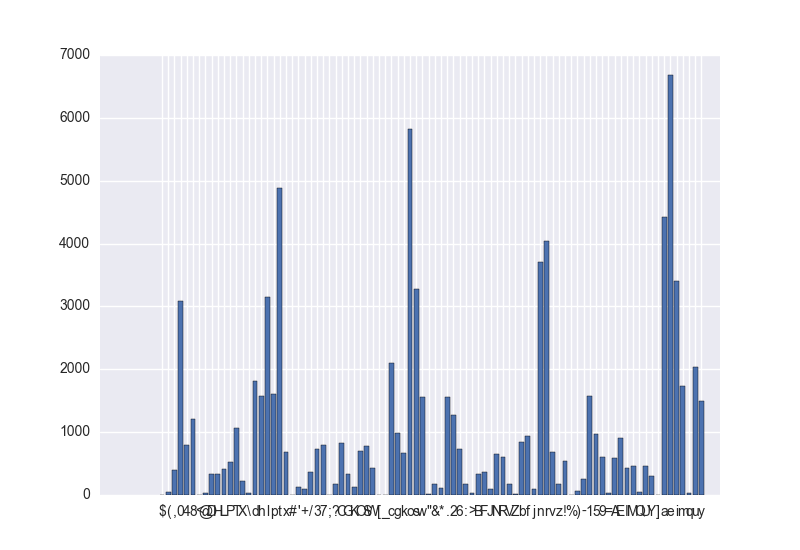

In [12]:
from IPython.display import Image
Image(filename='spam.png')

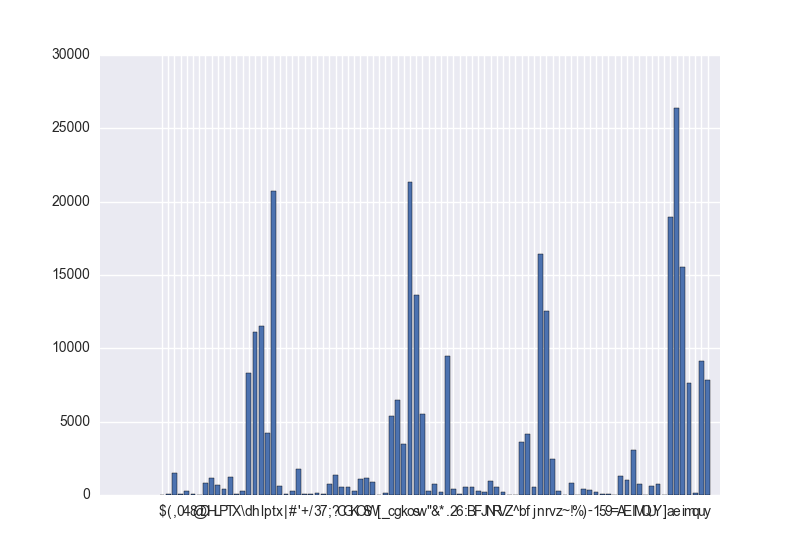

In [10]:
from IPython.display import Image
Image(filename='non_spam.png')

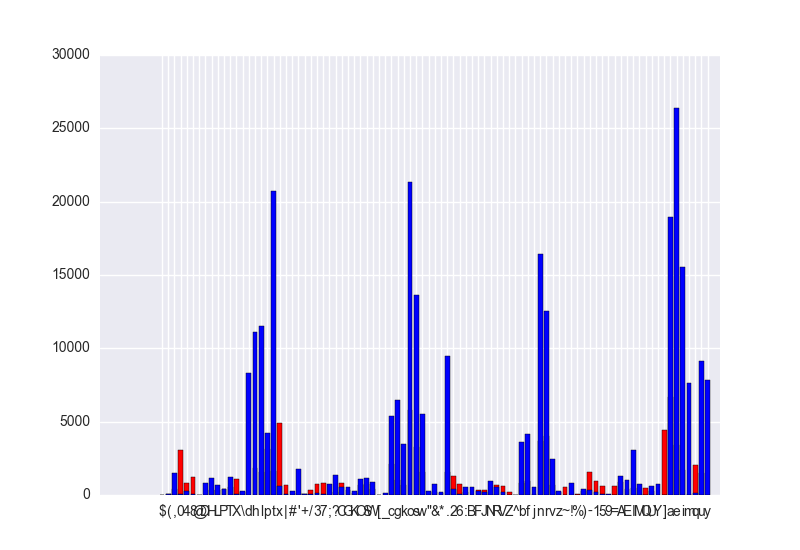

In [11]:
from IPython.display import Image
Image(filename='spamAndnotspam.png')

## Vectorization and Features Extraction

From the above analysis, I decided to use the text as it is. My main problem is to how convert the text to fixed-size vector so that I can feed this vector to a a binary discriminator. There are several approaches to make such embedding. I could use a simple Recurrent Neural Network and feed it with one-hot encoded words vectors. I could also use Doc2vec to make text embedding. But I thought about making an embedding in a character-level wise, in which I depend on the characters occurence to produce the feature vector.

Why character-level? Because we can identify whether the text is spam or not via the characters and their occurence shape. The text which has a lot of punctuations such as '!!!!' and '??' and other similar things could be an indicator for spamming.

The Fixed-Size Ordinally-Forgetting Encoding is an approach for words representation. You can check the original paper from here
http://www.aclweb.org/anthology/P15-2081

Simply, if we have a corpus that only consists of 3 characters, A B C. So, to represent the words by a fixed size-vector we do the following one-hot encoding

A = [1, 0, 0]
B = [0, 1, 0]
C = [0, 0, 1]

So, assume that we have a word "ABC", the representation would be based on the following formula
Z(t + 1) = Z(t) * alpha + word_vector, where t is the time step and alpha is a constant factor that is regularly between 0.1 and 0.9

It seems that it is a recurrence formula that. At first, we initialize the Z state by vector of zeros.
So, the vectorization would be

Z(1) = Z(0) * 0.1 + [1, 0, 0] = [0, 0, 0] * 0.1 + [1, 0, 0] = [1, 0, 0]
Z(2) = [1, 0, 0] * 0.1 + [0, 1, 0] = [0.1, 0, 0] + [0, 1, 0] = [0.1, 1, 0]
Z(3) = [0.1, 1, 0] * 0.1 + [0, 0, 1] = [0.01, 0.1, 0] + [0, 0, 1] = [0.01, 0.1, 1]

So, the word 'ABC' representation is [0.01, 0.1, 1]

Ignoring the spaces, the final representation of each text would a vector that has the size of the characters vocabulary.

I took the whole sentences and extracted the unique characters. Then I divided the data to training and testing sets, 5000 and 572 respectively.

In [13]:
import numpy as np
from itertools import chain
from collections import Counter
import copy as cp

"""
Vectorization based on this paper
http://www.aclweb.org/anthology/P15-2081
"""

class Vectorizer(object):
    def __init__(self, sentences):
        self.__sentences = sentences
        self.__char2onehot = {}
        self.__idx2char = {}

        self.__get_chars_vector()

    def __get_chars_vector(self):
        sentences_tokens = list(map(lambda v: v.split(), self.__sentences))
        sentences_tokens = list(chain.from_iterable(sentences_tokens))
        characters_frequencies = list(map(lambda v: Counter(v), sentences_tokens))
        all_counter = characters_frequencies[0]

        for i in range(1, len(characters_frequencies)):
            all_counter += characters_frequencies[i]

        one_hot = np.asarray([0] * len(all_counter.keys()))

        for i, char in enumerate(all_counter.keys()):
            temp_one_hot = cp.copy(one_hot)
            temp_one_hot[i] = 1

            self.__char2onehot[char] = temp_one_hot
            self.__idx2char[i] = char

    def get_char2onehot(self):
        return self.__char2onehot

    def get_char_vector(self, char):
        return self.__char2onehot[char]

    def text_to_vec(self, text, alpha=0.3):
        text_tokens = text.strip().split()
        z = np.asarray([0] * len(self.__char2onehot))

        for word in text_tokens:
            for char in word:
                z = np.add(np.multiply(z, alpha), self.__char2onehot[char] if char in self.__char2onehot else [0]*len(self.__char2onehot))

        return z

sentences, labels = dm.get_text(), dm.get_labels()
labels = list(map(lambda v: 0 if v == 'ham' else 1, labels))
vectorizer = Vectorizer(sentences)

sentences_features = []

for sentence in sentences:
    sentence_vector = vectorizer.text_to_vec(sentence, alpha=0.3)
    sentences_features.append(sentence_vector)

train_x, train_y = sentences_features[0:5000], labels[0:5000]
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

test_x, test_y = sentences_features[5000:], labels[5000:]
test_x = np.asarray(test_x)
test_y = np.asarray(test_y)

np.savetxt('train_x.txt', train_x)
np.savetxt('train_y.txt', train_y)
np.savetxt('test_x.txt', test_x)
np.savetxt('test_y.txt', test_y)

## Classification

After features extraction, I built a MLP model using Keras. I have tried different configurations for the network, and the best results I obtained is by the following:

1) 3 Hidden Layers with dropouts

2) Relu activation function for the hidden layers

3) Sigmoid for the output layer (binary classification)

4) 50 Epochs

5) 100 Batch size

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

train_x, train_y = np.loadtxt('train_x.txt'), np.loadtxt('train_y.txt')
features_length = train_x.shape[1]
print(features_length)

test_x, test_y = np.loadtxt('test_x.txt'), np.loadtxt('test_y.txt')

model = Sequential()
model.add(Dense(100, input_shape=(features_length,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=100, epochs=50)
preds = model.predict_classes(test_x)
score = model.evaluate(test_x, test_y)

print(score)

With above model, I managed to get an error of 0.1 in the testing data and approx. accuracy of 95%. In general, this dataset lacks the uniformity of the classes distribution. In other words, the number of the spams text are very much less than the non-spam ones, so, fitting such data won't generalize the solution to such problem.